In [11]:
from games import CongestionGameNoBridge

game = CongestionGameNoBridge()

In [6]:
game.play(100, till_convergence=True)

In [7]:
print(f'BD : {game.n_BD}, AC : {game.n_AC} \ncosts:{game.costs()}')

BD : 30, AC : 30 
costs:{'ABD': 23.0, 'ACD': 23.0}


In [8]:
sum = 0
for player in game.players:
    sum += player.accumulated_cost
print(f'Average cost is {sum/len(game.players)/game.iterations:.2f} per turn')

Average cost is 23.00 per turn


In [50]:
from games import CongestionGameBridge

gameB = CongestionGameBridge(gamma=1)

In [56]:
print(f'BD : {gameB.n_BD}, AC : {gameB.n_AC} \ncosts : {gameB.costs()}')

acts = [player.action for player in gameB.players]
print(''.join([f'{act} : {acts.count(act)},  ' for act in gameB.actions]))

BD : 32, AC : 33 
costs : {'ABD': 23.4, 'ACD': 23.6, 'ABCD': 30, 'ACBD': 17.0}
ABD : 15,  ACD : 16,  ABCD : 12,  ACBD : 17,  


In [52]:
gameB.play()

In [57]:
sum_all, sum_last = 0, 0
for player in gameB.players:
    sum_all += player.accumulated_cost
    sum_last += player.cost
print(f'Average cost is {sum_all/len(gameB.players)/gameB.iterations:.2f} per turn (over all turns)')
print(f'Average cost is {sum_last/len(gameB.players):.2f} in the last turn')

Average cost is 22.96 per turn (over all turns)
Average cost is 22.96 in the last turn


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

record = {}
for gamma in tqdm(np.arange(0.,1.5,0.01)):
    collect = []
    for _ in range(10):
        gameB = CongestionGameBridge(gamma=gamma)
        gameB.play(rounds = 100, till_convergence=True)
        sum_last = 0
        for player in gameB.players:
            sum_last += player.cost
        collect.append(sum_last/len(gameB.players))
    record[gamma] = min(collect)

100%|██████████| 150/150 [00:04<00:00, 34.70it/s]


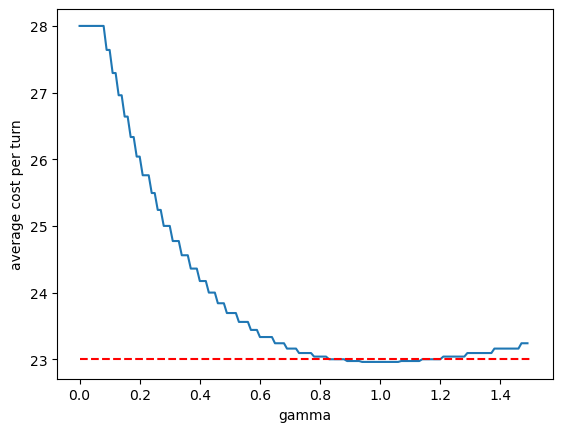

In [75]:
# plot a graph of the average cost per turn for each gamma
plt.plot(list(record.keys()), list(record.values()))
plt.xlabel('gamma')
plt.ylabel('average cost per turn')
# plot a straight line at average cost = 23
plt.plot([0,1.5], [23,23], 'r--')
plt.show()